# Lab (Extra) | Image Classification using CNN (reference solution)

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

In [ ]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [ ]:
# solution

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

print(x_test.shape)

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

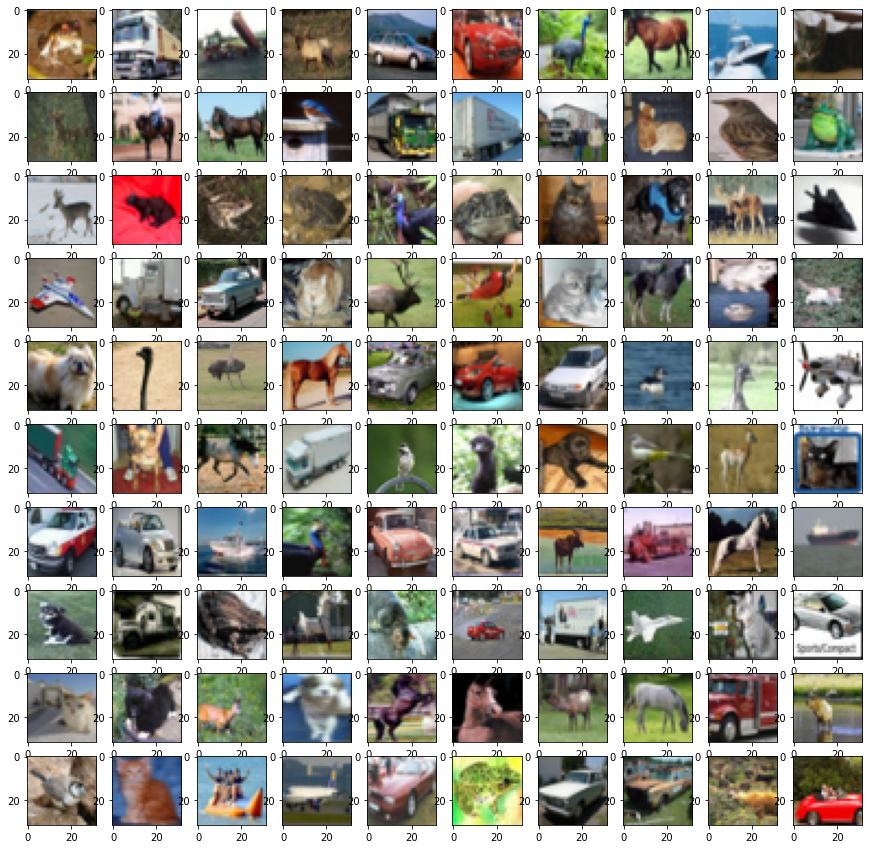

In [ ]:
# solution

import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=10, nrows=10, figsize=(15, 15))

for i in range(10):
	for j in range(10):
		axes[i][j].imshow(x_train[(i * 10) + j], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# solution

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# solution

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# solution

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
__________________________________________________

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
# solution

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [ ]:
# solution

history_tut = model.fit(x_train, y_train, batch_size=512, epochs=32)

Epoch 1/32
98/98 [==============================] - 2s 17ms/step - loss: 2.1677 - accuracy: 0.2077
Epoch 2/32
98/98 [==============================] - 2s 15ms/step - loss: 1.9895 - accuracy: 0.2988
Epoch 3/32
98/98 [==============================] - 2s 15ms/step - loss: 1.8853 - accuracy: 0.3361
Epoch 4/32
98/98 [==============================] - 1s 15ms/step - loss: 1.8189 - accuracy: 0.3636
Epoch 5/32
98/98 [==============================] - 2s 16ms/step - loss: 1.7682 - accuracy: 0.3846
Epoch 6/32
98/98 [==============================] - 1s 15ms/step - loss: 1.7303 - accuracy: 0.3966
Epoch 7/32
98/98 [==============================] - 1s 15ms/step - loss: 1.6952 - accuracy: 0.4090
Epoch 8/32
98/98 [==============================] - 2s 16ms/step - loss: 1.6543 - accuracy: 0.4279
Epoch 9/32
98/98 [==============================] - 2s 15ms/step - loss: 1.6310 - accuracy: 0.4330
Epoch 10/32
98/98 [==============================] - 2s 15ms/step - loss: 1.6051 - accuracy: 0.4405
Epoch 11/

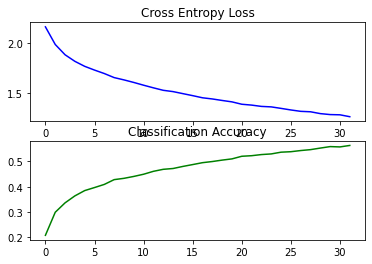

In [ ]:
# solution

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_tut.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_tut.history['accuracy'], color='green', label='train')
plt.show()

In [ ]:
from keras.backend import clear_session
clear_session()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 512 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3 followed by max pooling layer. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [ ]:
# solution

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
# solution

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [ ]:
# solution

history_deep = model.fit(x_train, y_train, batch_size=512, epochs=32)

Epoch 1/32
98/98 [==============================] - 4s 32ms/step - loss: 2.1498 - accuracy: 0.2222
Epoch 2/32
98/98 [==============================] - 3s 31ms/step - loss: 1.9777 - accuracy: 0.2999
Epoch 3/32
98/98 [==============================] - 3s 32ms/step - loss: 1.8553 - accuracy: 0.3546
Epoch 4/32
98/98 [==============================] - 3s 32ms/step - loss: 1.7702 - accuracy: 0.3838
Epoch 5/32
98/98 [==============================] - 3s 31ms/step - loss: 1.6978 - accuracy: 0.4089
Epoch 6/32
98/98 [==============================] - 3s 31ms/step - loss: 1.6460 - accuracy: 0.4256
Epoch 7/32
98/98 [==============================] - 3s 32ms/step - loss: 1.5987 - accuracy: 0.4419
Epoch 8/32
98/98 [==============================] - 3s 32ms/step - loss: 1.5551 - accuracy: 0.4566
Epoch 9/32
98/98 [==============================] - 3s 32ms/step - loss: 1.5256 - accuracy: 0.4666
Epoch 10/32
98/98 [==============================] - 3s 32ms/step - loss: 1.4923 - accuracy: 0.4796
Epoch 11/

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

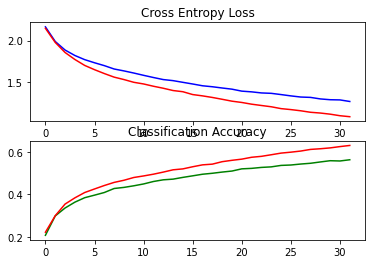

In [ ]:
# solution

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_tut.history['loss'], color='blue', label='tutorial')
plt.plot(history_deep.history['loss'], color='red', label='deep')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_tut.history['accuracy'], color='green', label='tutorial')
plt.plot(history_deep.history['accuracy'], color='red', label='deep')
plt.show()

**Solution**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
import numpy as np
predictions = model.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

(10000, 10)


In [ ]:
from sklearn.metrics import confusion_matrix

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

array([[660,  18,  27,  26,  27,  12,  32,  20, 105,  73],
       [ 33, 603,   3,  14,   8,   5,  30,  13,  43, 248],
       [ 70,   8, 304,  82, 159,  94, 161,  82,  19,  21],
       [ 18,   9,  35, 428,  75, 156, 161,  59,  12,  47],
       [ 30,   3,  38,  68, 508,  34, 185, 107,  11,  16],
       [  8,   2,  26, 200,  74, 479,  90,  87,  13,  21],
       [  4,   4,  23,  43,  45,  23, 821,  16,   4,  17],
       [ 12,   3,  15,  37,  62,  52,  38, 731,   4,  46],
       [110,  48,   6,  30,   8,   4,  15,  11, 693,  75],
       [ 31,  64,   8,  23,   7,  10,  39,  32,  32, 754]])

**Solution**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# solution

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.1542 - accuracy: 0.5981
Test loss: 1.1542447805404663
Test accuracy: 0.5981000065803528


In [ ]:
from keras.backend import clear_session
clear_session()

## Define the complete VGG architecture.

**Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

*   Change the size of input to 64 x 64.

In [ ]:
from skimage.transform import resize

x_train_resized = []
for i, _ in enumerate(x_train):
    x_train_resized.append(resize(x_train[i], (64, 64)))

x_test_resized = []
for i, _ in enumerate(x_test):
    x_test_resized.append(resize(x_test[i], (64, 64)))

x_train = np.array(x_train_resized)
x_test = np.array(x_test_resized)

In [ ]:
# solution

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                    

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# solution

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [ ]:
# solution

history_vgg = model.fit(x_train, y_train, batch_size=512, epochs=32)

Epoch 1/32
98/98 [==============================] - 66s 574ms/step - loss: 2.1928 - accuracy: 0.2024
Epoch 2/32
98/98 [==============================] - 50s 512ms/step - loss: 1.9986 - accuracy: 0.2902
Epoch 3/32
98/98 [==============================] - 50s 512ms/step - loss: 1.8487 - accuracy: 0.3493
Epoch 4/32
98/98 [==============================] - 50s 512ms/step - loss: 1.7269 - accuracy: 0.3877
Epoch 5/32
98/98 [==============================] - 50s 512ms/step - loss: 1.6185 - accuracy: 0.4270
Epoch 6/32
98/98 [==============================] - 50s 513ms/step - loss: 1.5523 - accuracy: 0.4512
Epoch 7/32
98/98 [==============================] - 50s 513ms/step - loss: 1.4661 - accuracy: 0.4780
Epoch 8/32
98/98 [==============================] - 50s 513ms/step - loss: 1.4144 - accuracy: 0.5031
Epoch 9/32
98/98 [==============================] - 50s 512ms/step - loss: 1.3683 - accuracy: 0.5190
Epoch 10/32
98/98 [==============================] - 50s 513ms/step - loss: 1.3262 - accura

In [ ]:
# solution

predictions = model.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

(10000, 10)


In [ ]:
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

array([[824,   6,  34,  20,  23,   2,  21,  11,  35,  24],
       [124, 604,  23,  13,  16,   4,  28,  13,  35, 140],
       [ 87,   4, 510,  83,  96,  39, 129,  38,   6,   8],
       [ 32,   3,  66, 502,  75,  89, 166,  39,  11,  17],
       [ 43,   1,  80,  64, 581,  11, 128,  84,   6,   2],
       [ 17,   2,  70, 283,  73, 383,  95,  67,   4,   6],
       [ 13,   0,  37,  47,  33,   7, 838,  13,   5,   7],
       [ 24,   1,  33,  58,  88,  29,  46, 707,   2,  12],
       [178,  21,  22,  34,  19,   5,  21,  10, 663,  27],
       [ 90,  57,  19,  30,  17,  12,  38,  36,  31, 670]])

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

*(Double-click or enter to edit)*

...

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False)